In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [139]:
df = pd.read_csv("./iot_data.csv")
df_for_pred = df[df.label == 'rice']

In [132]:
df.label.value_counts()

rice      100
apple     100
coffee    100
Name: label, dtype: int64

In [140]:
X_for_pred = pd.DataFrame(columns = ['j_3', 'j_2', 'j_1', 'label'])
for i, k in enumerate(range(len(df_for_pred))):
    if i >2:
        X_for_pred.loc[i, 'j_3'] = df_for_pred.N[i-3 : i].values[0]
        X_for_pred.loc[i, 'j_2'] = df_for_pred.N[i-3 : i].values[1]
        X_for_pred.loc[i, 'j_1'] = df_for_pred.N[i-3 : i].values[2]
        X_for_pred.loc[i, 'label'] = df_for_pred.N[i]
    else:
        X_for_pred.loc[i, 'label'] = 0

In [141]:
X_for_pred = X_for_pred.dropna()

In [142]:
X_for_pred

,j_3,j_2,j_1,label
3,90,85,60,74
4,85,60,74,78
5,60,74,78,69
6,74,78,69,69
7,78,69,69,94
...,...,...,...,...
95,81,78,60,88
96,78,60,88,93
97,60,88,93,60
98,88,93,60,78


In [136]:
df

,timestamp,N,P,K,temperature,humidity,ph,rainfall,label
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...,...
295,95,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
296,96,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
297,97,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
298,98,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [144]:
X_for_pred

,j_3,j_2,j_1,label
3,90,85,60,74
4,85,60,74,78
5,60,74,78,69
6,74,78,69,69
7,78,69,69,94
...,...,...,...,...
95,81,78,60,88
96,78,60,88,93
97,60,88,93,60
98,88,93,60,78


In [159]:

lr = LinearRegression()
X_train, X_test, y_train, y_test = X_for_pred.iloc[:50, :-1], X_for_pred.iloc[50:, :-1], X_for_pred.iloc[:50, -1], X_for_pred.iloc[50:, -1]

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print(r2_score(y_test, lr_pred))

preds_final = np.insert(lr.predict(X_for_pred.iloc[:, :-1]), 0, 0)
for i in range(2):
    preds_final = np.insert(preds_final, 0, 0)
# def lr(x):
    

# df['N_pred']= df.N.apply(lambda x : lr(x))




-0.07748568483987395


In [156]:
y_test

53    65
54    95
55    75
56    74
57    91
58    71
59    99
60    72
61    83
62    93
63    70
64    76
65    99
66    99
67    86
68    69
69    91
70    61
71    67
72    79
73    78
74    75
75    97
76    67
77    73
78    77
79    81
80    68
81    72
82    61
83    67
84    67
85    66
86    82
87    84
88    81
89    91
90    93
91    90
92    81
93    78
94    60
95    88
96    93
97    60
98    78
99    65
Name: label, dtype: object

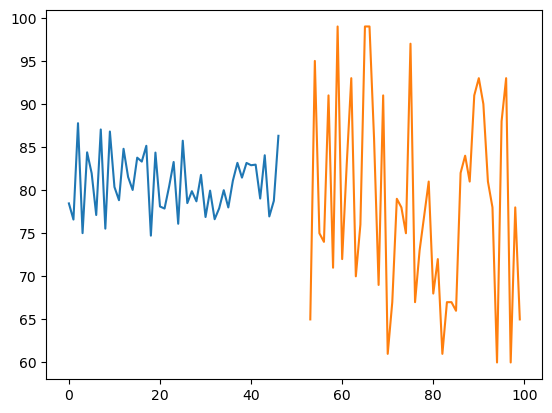

In [157]:
plt.plot(lr_pred)
plt.plot(y_test)

In [122]:
df['prediction'] = preds_final

In [123]:
df.prediction = df.prediction.replace(0, np.mean(df.N))

In [124]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,prediction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,50.551818
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,50.551818
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,50.551818
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,76.250925
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,72.101417
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,102.061825
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,103.239354
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,97.225593
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,104.370477


In [30]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [6]:
labels  = df["label"].unique()
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [129]:
import requests
import time

product = df["label"].values[0]

while True:
    for i in range(100):
        time.sleep(1)
        print(requests.post("http://localhost:8080/api/v1" + product + "/telemetry", json=df.iloc[i].to_dict()))

<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>
<Response [401]>


KeyboardInterrupt: 

In [28]:
def 

SyntaxError: invalid syntax (1885169875.py, line 1)

In [21]:
df.iloc[0].to_dict()

{'N': 90,
 'P': 42,
 'K': 43,
 'temperature': 20.87974371,
 'humidity': 82.00274423,
 'ph': 6.502985292000001,
 'rainfall': 202.9355362,
 'label': 'rice'}